##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs)

### Overview
Image classification is a fundamental task in Computer Vision, enabling the categorization of images into predefined classes. This capability powers a wide range of applications, from object detection in pictures to content filtering on social media.

### Objective

In this lab, we’ll implement a Convolutional Neural Network (CNN) for image classification using Python and the Keras Deep Learning library. We’ll work with the CIFAR-10 dataset, which contains 10 classes of common objects like airplanes, cars, and birds. By the end, you’ll have a CNN model that can accurately classify these images.

### Tools & Libraries
- Python  
- NumPy  
- TensorFlow
- Matplotlib  
- Sklearn
- Seaborn 

### The Dataset

The [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)  dataset consists of:

- **50,000 training images**
- **10,000 test images**

Each image has the following properties:

- Size: **32 × 32 pixels**
- Color channels: **3 (RGB)**
- Number of classes: **10 (labeled 0–9)**  
  Examples include: *airplane, car, bird,* and more.

This dataset is particularly popular because:

- It is **large enough to be challenging**
- **Small enough to train quickly** on modest hardware
- Provides a good **balance between complexity and accessibility**
- Contains **real-world objects** that are easily recognizable


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Dataset shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of unique classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 78s 0us/step


c:\Users\lujee\anaconda3\envs\cv_lab\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Number of classes: 10


#### Output

- **`x_train` shape:** `(50000, 32, 32, 3)`  
  → 50,000 training images of size 32×32 with 3 color channels (RGB)

- **`y_train` shape:** `(50000, 1)`  
  → Labels corresponding to the training images

- **`x_test` shape:** `(10000, 32, 32, 3)`  
  → 10,000 test images

- **`y_test` shape:** `(10000, 1)`  
  → Labels corresponding to the test images

- **Number of classes:** `10`

---

Next, we can visualize some random images along with their corresponding labels:

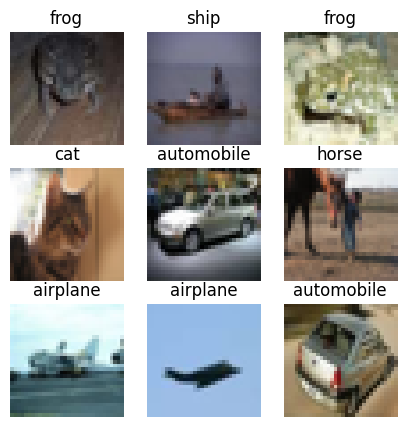

In [2]:
# Define class names for easy reference
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]

# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(5, 5))
for i in range(9):
    index = np.random.randint(0, len(x_train))
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[index])
    plt.title(class_names[y_train[index][0]])
    plt.axis("off")
plt.show()

What about the **class distribution** of the dataset? This is key for identifying potential bias.

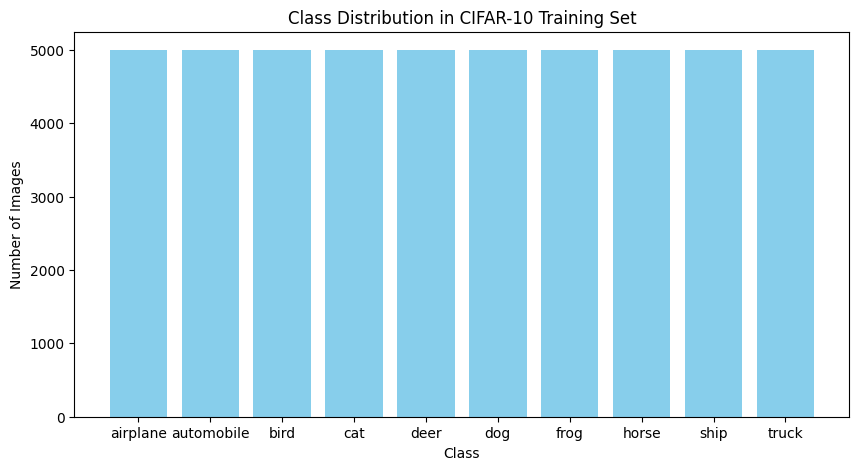

In [3]:
# Count occurrences of each class in the training set
class_counts = np.bincount(y_train.flatten())

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts, color='skyblue')
plt.title("Class Distribution in CIFAR-10 Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In CIFAR-10, each class typically has an equal number of images, making it a super-balanced dataset.

We can also review the **pixel value** range.

In [4]:
# Check the minimum and maximum pixel values
print(f"Minimum pixel value: {x_train.min()}")
print(f"Maximum pixel value: {x_train.max()}")

Minimum pixel value: 0
Maximum pixel value: 255


Pixel values are in the range [0, 255].

Why is this important? Because we can normalize them to [0, 1] for a better image classification model performance, which will be done in the preprocessing step.

### Building the Image Classification Model
Now, we’ll create a Convolutional Neural Network (CNN) for our classification task. CNNs are particularly well-suited for image processing because they can automatically learn spatial hierarchies of features from the input images.

Our CNN architecture consists of several key components:

#### Convolutional Layers
- Extract features from the input images
- Learn patterns like edges, textures, and shapes
- Use ReLU activation to introduce non-linearity

#### MaxPooling Layers
- Reduce spatial dimensions
- Help make the features more robust
- Decrease computational complexity

#### Dense Layers
- Process the extracted features
- Learn to classify based on the features
- Final layer uses softmax for probability distribution

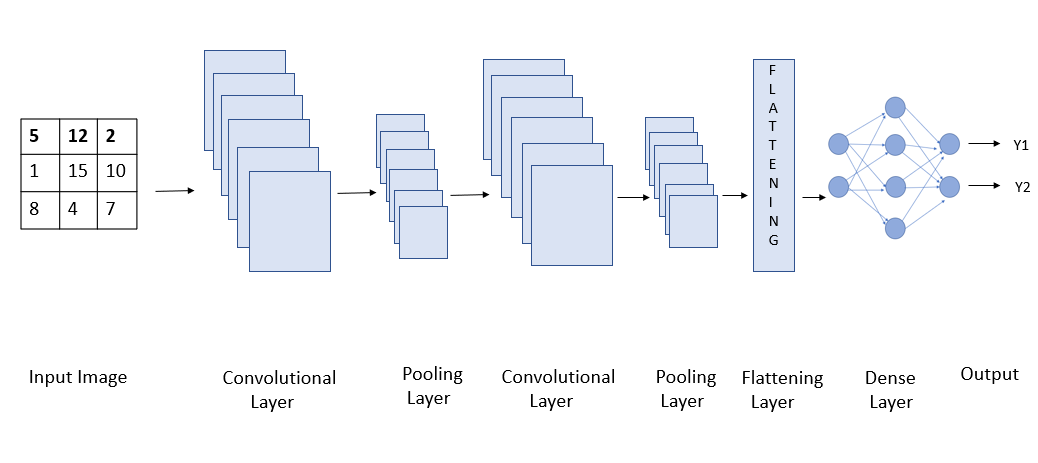

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

c:\Users\lujee\anaconda3\envs\cv_lab\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.4572 - loss: 1.5006 - val_accuracy: 0.5633 - val_loss: 1.2352
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.5924 - loss: 1.1558 - val_accuracy: 0.5993 - val_loss: 1.1343
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6449 - loss: 1.0135 - val_accuracy: 0.6399 - val_loss: 1.0434
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6805 - loss: 0.9146 - val_accuracy: 0.6706 - val_loss: 0.9533
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.7133 - loss: 0.8270 - val_accuracy: 0.6840 - val_loss: 0.9121
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7362 - loss: 0.7623 - val_accuracy: 0.6843 - val_loss: 0.9242
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.7586 - loss: 0.6982 - val_accuracy: 0.6999 - val_loss: 0.8993
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.7750 - loss: 0.6434 - 

### Breaking the Code
Let’s break the code down to understand what we did.

---

#### Import Libraries

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
```

This step imports the following required libraries:

`tensorflow and keras` for deep learning functionalities.  
`Sequential` to create a simple model by stacking layers.  
`Conv2D, MaxPooling2D, Flatten, and Dense` to define the model architecture.  
`cifar10` to load the CIFAR-10 dataset.  
`to_categorical` for one-hot encoding the labels.  


#### Load and Preprocess the CIFAR-10 Dataset
```
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

```

- **Dataset Loading:** `cifar10.load_data()` splits the data into training and test sets.  
- **Normalization:** Divides the pixel values by 255 to bring them into the range [0, 1], improving the model’s convergence.  
- **One-hot Encoding:** Converts labels into a one-hot format, which is required for categorical classification with 10 classes (e.g., [0,1,0,0,0,0,0,0,0,0] for class 1).


### Build the CNN Model
```
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes for CIFAR-10
])
```

- **First Convolutional Layer:** `Conv2D` layers with ReLU activation learn spatial features from the images. `Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))` uses input images of 32×32 pixels with 3 color channels (RGB), creating 32 different 3×3 filters (kernels). The output shape = 30×30×32 is reduced by 2 in each dimension due to padding effects.

- **First Pooling Layer:** `MaxPooling2D` layers reduce the spatial size, helping to decrease computation and improve generalization. `MaxPooling2D(2, 2)` takes 2×2 windows and keeps the maximum value. It reduces spatial dimensions by half, generating an output shape = 15×15×32. This helps make feature detection more robust to position changes.

- **Second Convolutional Layer:** `Conv2D(64, (3, 3), activation='relu')` has more filters than the first one to detect more complex patterns. It creates 64 different 3×3 filters, with an output shape = 13×13×64. At this level, filters might detect higher-level features like shapes or patterns.

- **Second Pooling Layer:** `MaxPooling2D(2, 2)` reduces spatial dimensions by half again, reaching an output shape = 6×6×64. This further reduces computation and helps prevent overfitting.

- **Flatten Layer:** `Flatten()` converts the 3D output of the convolutions (6×6×64) into a 1D vector (6×6×64 = 2,304 values), which is essential for connecting to dense layers.

- **First Dense Layer:** `Dense(128, activation='relu')` serves as a hidden layer with 128 units. It processes the flattened features with a ReLU activation that adds non-linearity.

- **Output Layer:** `Dense(10, activation='softmax')` outputs probabilities for each of the 10 classes. Softmax activation ensures outputs sum to 1, since each output represents the probability of the image belonging to that class.


#### Compile the Model
```
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```

- **Optimizer:** `adam` optimizer for efficient gradient descent.  
- **Loss Function:** categorical_crossentropy for multi-class classification.  
- **Metrics:** Track accuracy to evaluate the model's performance.  


#### Train the Model
```
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
```

- **Training Data:** The model is trained on x_train and y_train.  
- **Epochs:** Set to 10, meaning the model will go through the entire training set 10 times.  
- **Batch Size:** 64, which determines the number of samples per gradient update.  
- **Validation Data:** Evaluates the model’s performance on x_test and y_test at the end of each epoch.  

#### Evaluate the model
```
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')
```

Finally, the model is evaluated on the test data to determine its accuracy, and the test accuracy reaches a value close to 0,7.

You can get a snapshot of the model by using the `summary` function:


In [6]:
model. summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 947,168 (3.61 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 631,446 (2.41 MB)

#### More on Evaluation
We’ll save the model training history as a variable, which we will use to plot accuracy and loss over epochs.

In [7]:
# Train the model and save the training history
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8278 - loss: 0.4950 - val_accuracy: 0.7056 - val_loss: 0.9458
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.8425 - loss: 0.4475 - val_accuracy: 0.7081 - val_loss: 0.9724
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.8598 - loss: 0.4010 - val_accuracy: 0.6992 - val_loss: 1.0404
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8722 - loss: 0.3645 - val_accuracy: 0.7045 - val_loss: 1.0578
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.8885 - loss: 0.3217 - val_accuracy: 0.7023 - val_loss: 1.0913
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9009 - loss: 0.2835 - val_accuracy: 0.7005 - val_loss: 1.2058
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9130 - loss: 0.2519 - val_accuracy: 0.7038 - val_loss: 1.2370
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9214 - loss: 0.2230 - 

In [8]:
history

#### Visualization
Next, we’ll perform a visualization to understand if the model is overfitting or underfitting.

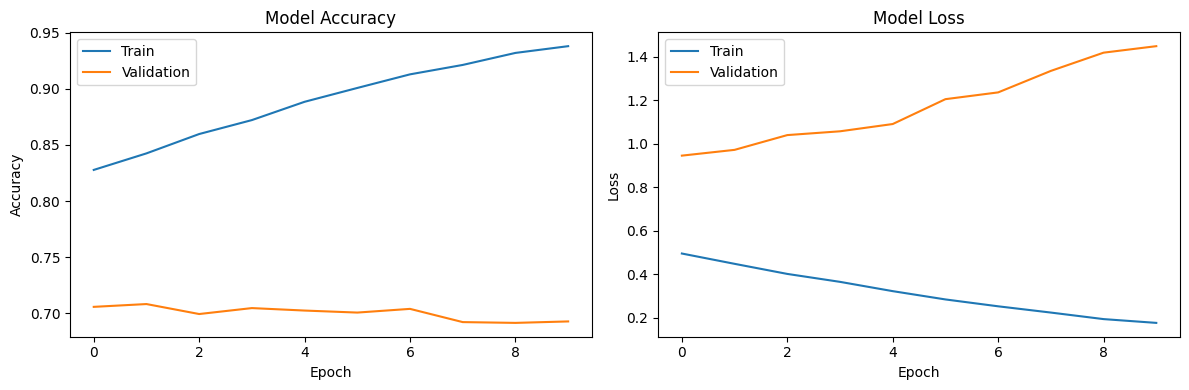

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

The following plot shows:

- **Accuracy:** How well the model correctly classifies images on training and validation sets over each epoch.
- **Loss:** The error level at each epoch; ideally, it should decrease as accuracy increases.

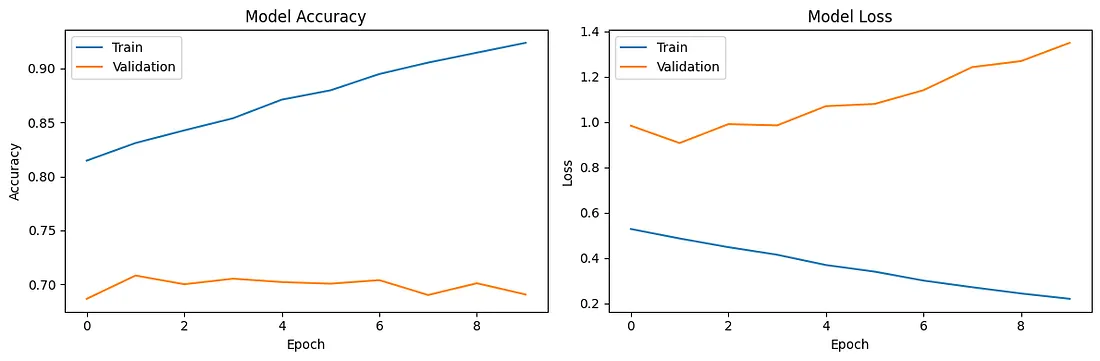

We can also estimate a **confusion matrix** to understand which classes the model often misclassified. The confusion matrix shows where the model makes correct predictions (along the diagonal) and where it misclassifies images (off-diagonal cells). This can reveal specific classes that are harder to distinguish.

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


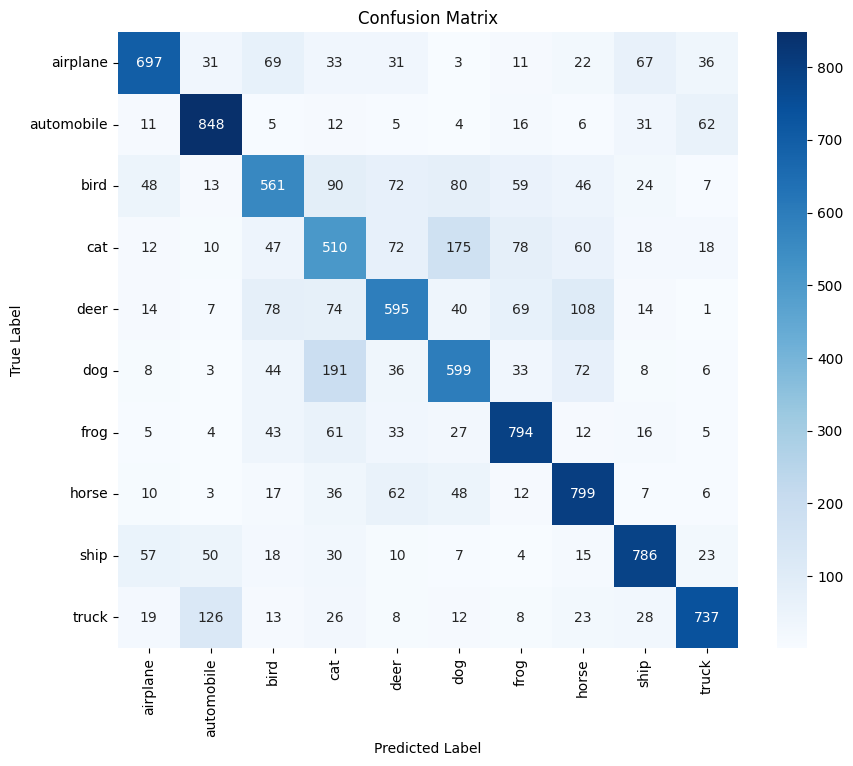

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

You can also visualize sample predictions with their true and predicted labels, which can provide quick insights into specific cases in which the model was right or wrong.

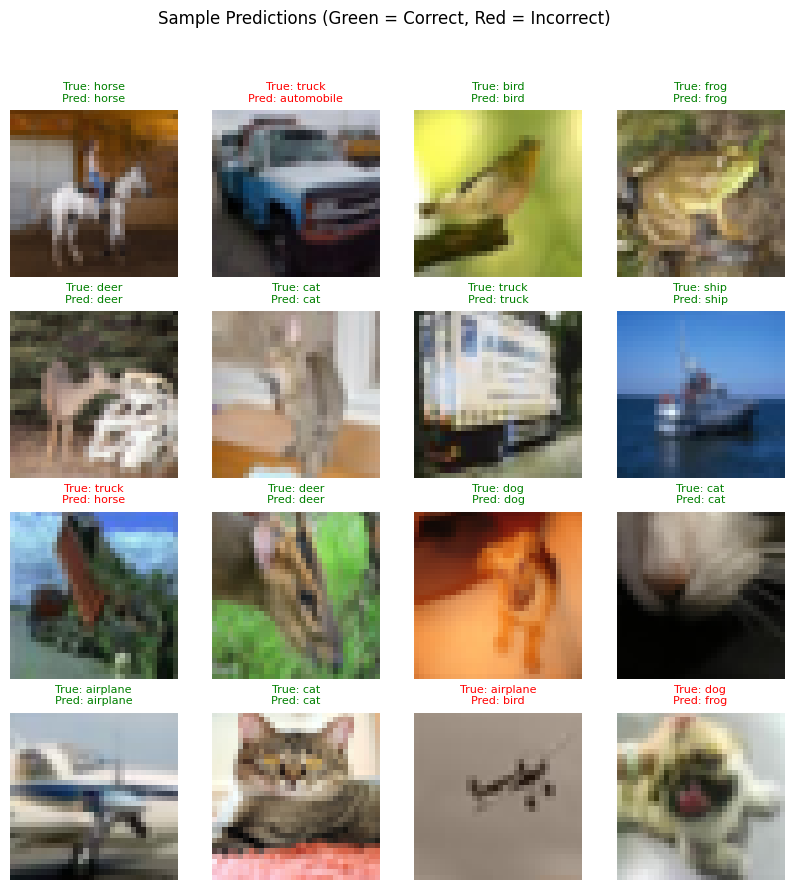

In [11]:
# Plot sample images with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(16):
    index = np.random.randint(0, len(x_test))
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[index])
    true_label = class_names[y_true_classes[index]]
    pred_label = class_names[y_pred_classes[index]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color, fontsize=8)
    plt.axis("off")
plt.suptitle("Sample Predictions (Green = Correct, Red = Incorrect)")
plt.show()

### Conclusion
This notebook has shown how to build a basic CNN for image classification using the CIFAR-10 dataset. 

While achieving ~70% accuracy, this is a starting point for more advanced implementations. To enhance the model’s performance, consider:

- Data Augmentation
- Deeper Architecture
- Regularization Techniques
- Learning Rate Scheduling
- Ensemble Methods

The concepts learned here can be applied to other image classification tasks with different datasets and requirements.

[Reference](https://lopezyse.medium.com/computer-vision-image-classification-using-python-913cf7156812)